Name : Junaid Salman
CIP : DEP1353


---



# Dataset Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the datasets
df = pd.read_csv('telecom_churn.csv')

# Data Cleaning and Preprocessing

In [5]:
# Get the number of columns and rows in the DataFrame
num_columns = df.shape[1]
num_rows = df.shape[0]

# Print the number of columns and rows
print(f"Number of columns: {num_columns}")
print(f"Number of rows: {num_rows}")

Number of columns: 11
Number of rows: 3333


In [6]:
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [7]:
# Get all the column names
column_names = df.columns

# Print all the column names
print("Column names:")
for name in column_names:
    print(name)

Column names:
Churn
AccountWeeks
ContractRenewal
DataPlan
DataUsage
CustServCalls
DayMins
DayCalls
MonthlyCharge
OverageFee
RoamMins


In [8]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [9]:
# Assuming 'data' is your DataFrame and 'Churn' is the first column
X = df.iloc[:, 1:]  # All columns except the first one
y = df.iloc[:, 0]   # First column

In [10]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Exploratory Data Analysis

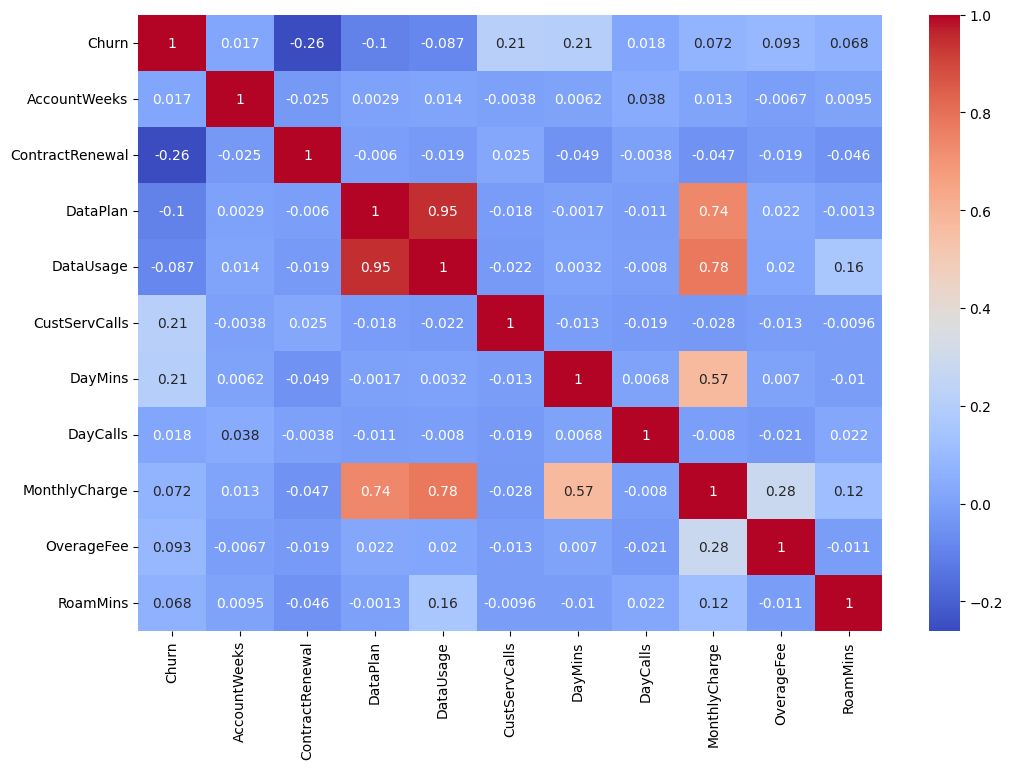

In [19]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Model Selection and Training

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [16]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}\n")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.30       143

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000

Accuracy: 0.867



In [17]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")

Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       857
           1       0.90      0.62      0.74       143

    accuracy                           0.94      1000
   macro avg       0.92      0.81      0.85      1000
weighted avg       0.93      0.94      0.93      1000

Accuracy: 0.936



# Model Evaluation and Fine-Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Best model from Grid Search
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Model Performance on Test Set:")
print(classification_report(y_test, y_pred_best_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}\n")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       857
           1       0.92      0.62      0.74       143

    accuracy                           0.94      1000
   macro avg       0.93      0.81      0.85      1000
weighted avg       0.94      0.94      0.93      1000

Accuracy: 0.938

